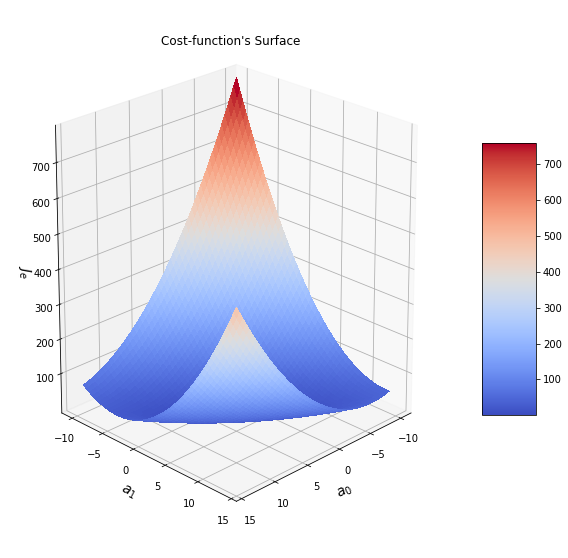

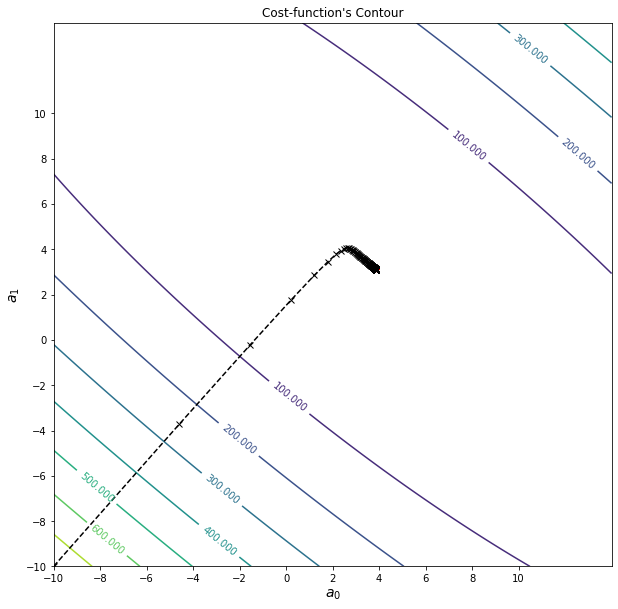

a0_opt: 3.883240259177178
a1_opt: 3.0985540695711684
a0_gd: 3.8832402591771142
a1_gd: 3.0985540695712235


In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#%matplotlib notebook
#%matplotlib widget

M = 1000

X = 2 * np.random.rand(M, 1)
y = 4 + 3 * X + np.random.randn(M, 1)

# add x0 = 1 to each instance.
X_b = np.c_[np.ones((M, 1)), X]

# Generate values for parameters.
N = 200
a0 = np.linspace(-10.0, 14.0, N)
a1 = np.linspace(-10.0, 14.0, N)

A0, A1 = np.meshgrid(a0, a1)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A0[iter1][iter2] + A1[iter1][iter2]*X
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )
        
# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
fig
#Show the plot.
plt.show()

# Closed-form solution.
X = X_b

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

yhat = a_opt[0, 0] + a_opt[1, 0]*X

Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

# Batch gradient descent solution.
alpha = 0.1  # learning rate
n_iterations = 1000

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -10;
a[1] = -10;

# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Batch gradient-descent loop.
for iteration in range(n_iterations):
    gradients = -2/M * X_b.T.dot(y - X_b.dot(a))
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]

# Plot figure.        
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx--')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

# Print found values.
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))

print('a0_gd: ' + str(a[0, 0]))
print('a1_gd: ' + str(a[1, 0]))
